In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [2]:
#setting default figure size=(10,10)
plt.rcParams['figure.figsize']=(10,10)

In [3]:
#this fuction converts image into numpy array
lena = cv2.imread('lena.png')

In [4]:
lena.shape

(512, 512, 3)

In [5]:
# Convert the image to grayscale (desaturate)
gray = cv2.cvtColor(lena, cv2.COLOR_RGB2GRAY)

# Save the grayscale image
cv2.imwrite('lena_gray.jpg', gray)

True

In [6]:
#read the gray scale image
gray_img = cv2.imread('lena_gray.jpg', cv2.IMREAD_GRAYSCALE)

In [7]:
gray_img.shape

(512, 512)

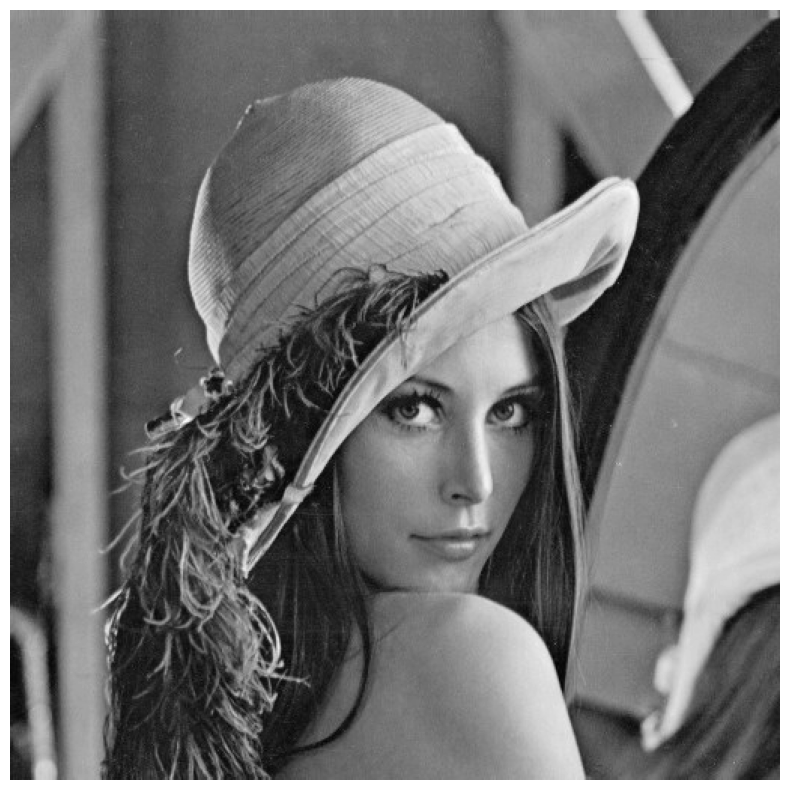

In [8]:
plt.imshow(gray_img,cmap='gray');
plt.axis('off')
plt.show()
# Turn off axis labels

In [9]:
height,width=gray_img.shape

In [10]:
#This function performs convolution operation with the given kernel(filter)
def forward_pass(kernel):
    Z=np.zeros((height-2,width-2)) #initialise output array of zeros with size (height-2,width-2)
    for i in range(height-2):
        vert_start=i
        vert_end=i+3
        for j in range(width-2):
            horiz_start=j
            horiz_end=j+3
            img_slice=gray_img[vert_start:vert_end,horiz_start:horiz_end] # part of image to convolve with the kernel
            Z[i,j]=output=np.sum(np.multiply(img_slice,kernel))
    return Z

In [11]:
#function to visualize the images
def visualize(f1,f2,title1='Vertical edges',title2="Horizontal edges"):
    fig, ax = plt.subplots(1, 2)
    ax[0].set_title(title1)
    ax[0].axis('off')
    ax[0].imshow(f1,cmap='gray')
    ax[1].set_title(title2)
    ax[1].axis('off')
    ax[1].imshow(f2,cmap='gray')

# Forward Gradient

In [89]:
fx_forward_filter=np.array([0,1,-1,
                           0, 1,-1,
                           0, 1,-1]).reshape(3,3)
fy_forward_filter=np.array([0,0,0,
                            1,1, 1,
                            -1,-1,-1]).reshape(3,3)

In [90]:
fx=forward_pass(fx_forward_filter) #forward derivative of image w.r.t x axis
fy=forward_pass(fy_forward_filter) # forward derivative of image wrt y axis

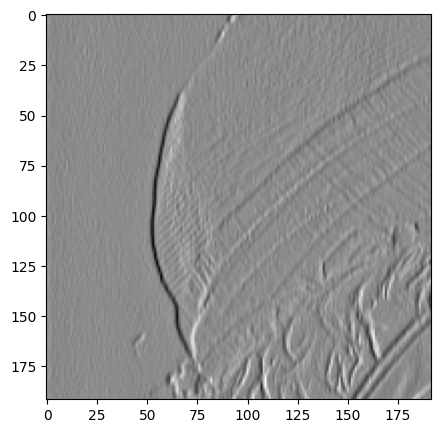

In [92]:
plt.figure(figsize=(5,5))
plt.imshow(fx[64:256,64:256],cmap='gray')

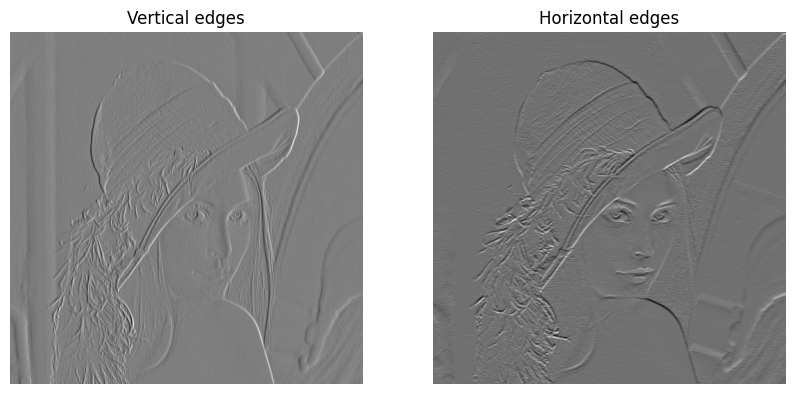

In [16]:
visualize(fx,fy)

In [17]:
gradient=[fx,fy]

In [18]:
gradient_magnitude=np.sqrt(gradient[0]*gradient[0]+gradient[1]*gradient[1])

In [19]:
gradient_orientation=np.arctan2(gradient[1],gradient[0]) #gradient orientation in radians
gradient_orientation = np.degrees(gradient_orientation)# gradient orientation in degrees
gradient_orientation[gradient_orientation < 0] += 360 # mapping graident orienatition in the range (0,360)

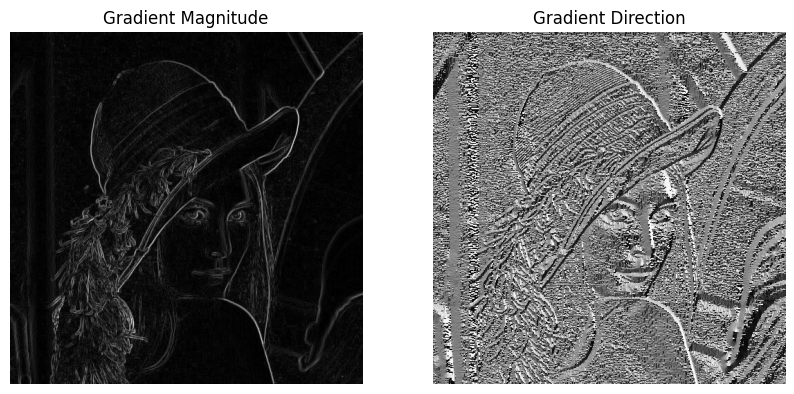

In [20]:
visualize(gradient_magnitude,gradient_orientation,title1='Gradient Magnitude',title2='Gradient Direction')

# Backward Gradient

In [94]:
fx_backward_filter=np.array([-1,1,0,
                           -1, 1,0,
                           -1, 1,0]).reshape(3,3)
fy_backward_filter=np.array([-1,-1,-1,
                            1,1, 1,
                            0,0,0]).reshape(3,3)

In [95]:
fx=forward_pass(fx_backward_filter) #backward derivative of image w.r.t x axis
fy=forward_pass(fy_backward_filter)#backward derivative of image w.r.t x axis

In [23]:
# we need to normalize the pixels value in the range [0,255]
# fx=((fx-np.min(fx))/(np.max(fx)-np.min(fx)))*255
# fy=((fy-np.min(fy))/(np.max(fy)-np.min(fy)))*255

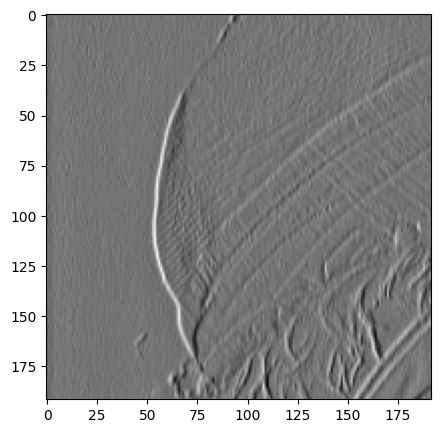

In [96]:
plt.figure(figsize=(5,5))
plt.imshow(fx[64:256,64:256],cmap='gray')

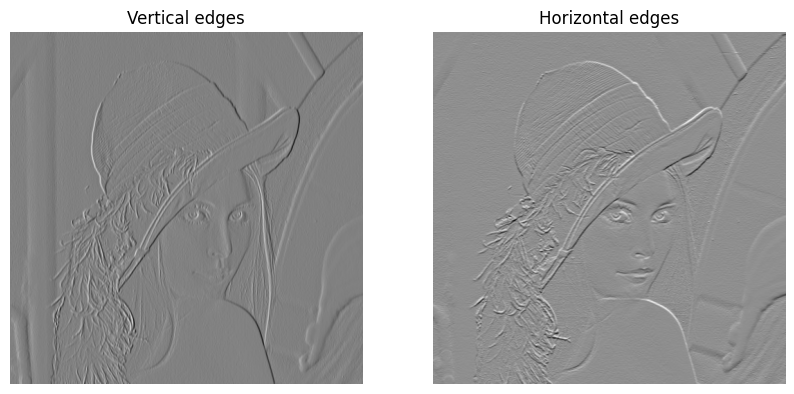

In [24]:
visualize(fx,fy)

In [25]:
gradient=[fx,fy]

In [26]:
gradient_magnitude=np.sqrt(gradient[0]*gradient[0]+gradient[1]*gradient[1])

In [27]:
gradient_orientation=np.arctan2(gradient[1],gradient[0])
gradient_orientation = np.degrees(gradient_orientation)
gradient_orientation[gradient_orientation < 0] += 360

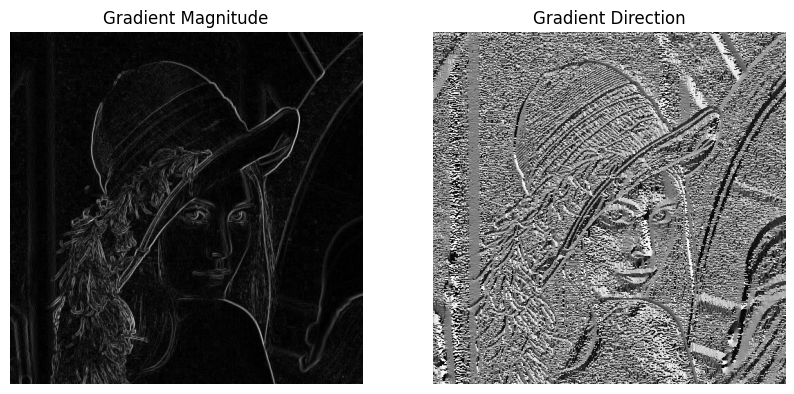

In [28]:
visualize(gradient_magnitude,gradient_orientation,title1='Gradient Magnitude',title2='Gradient Direction')

# Central Gradient

In [97]:
fx_backward_filter=np.array([1,0,-1,
                           1, 0,-1,
                           1, 0,-1]).reshape(3,3)
fy_backward_filter=np.array([1,1,1,
                            0,0, 0,
                            -1,-1,-1]).reshape(3,3)

In [98]:
fx=forward_pass(fx_backward_filter) #central derivative of image w.r.t x axis
fy=forward_pass(fy_backward_filter)#central derivative of image w.r.t x axis

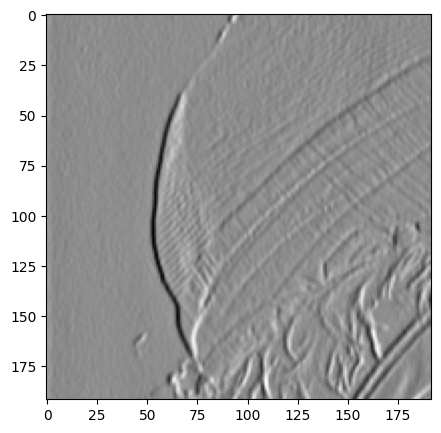

In [99]:
plt.figure(figsize=(5,5))
plt.imshow(fx[64:256,64:256],cmap='gray')

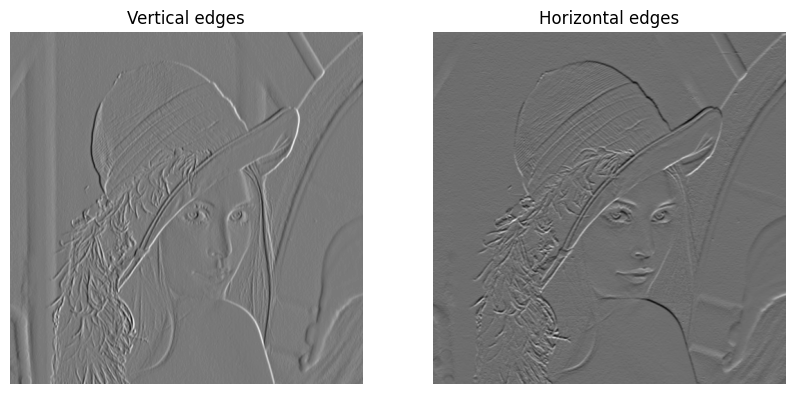

In [31]:
visualize(fx,fy)

In [32]:
gradient=[fx,fy]

In [33]:
gradient_magnitude=np.sqrt(fx*fx+fy*fy)

In [34]:
gradient_orientation=np.arctan2(fy,fx)
gradient_orientation = np.degrees(gradient_orientation)
gradient_orientation[gradient_orientation < 0] += 360

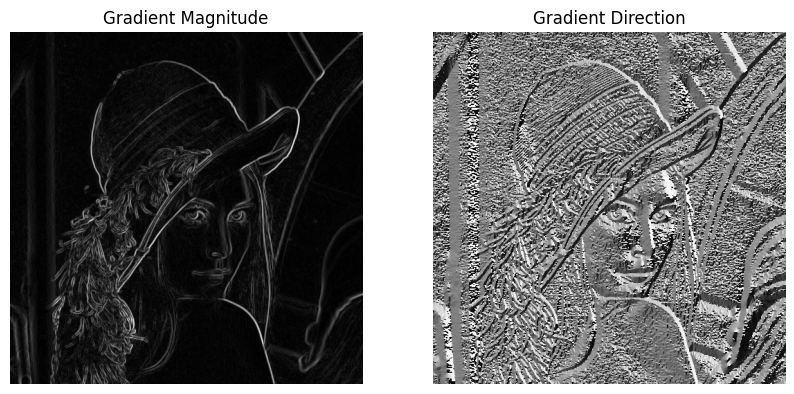

In [36]:
visualize(gradient_magnitude,gradient_orientation,title1='Gradient Magnitude',title2='Gradient Direction')

# Q.2

# LoG(Laplacian of Gaussian)

In [37]:
# LoG is sensitive to noise hence we need to perform Gaussian Smoothing of the image first
smoothed_img = cv2.GaussianBlur(gray_img, (0,0), 1.6)
#here by using (0,0) as parameter adjusts kernel size as per the given sigma
#kernel_size=int(6*sigma)+1

In [38]:
#use laplacian filter on the smoothed image
log1 = cv2.Laplacian(smoothed_img, cv2.CV_64F) #convolve laplacian filter with the smoothed image,CV_64F means the numpy array dtype is float64 
log2 = cv2.convertScaleAbs(log1) #converts the results in absolute values 

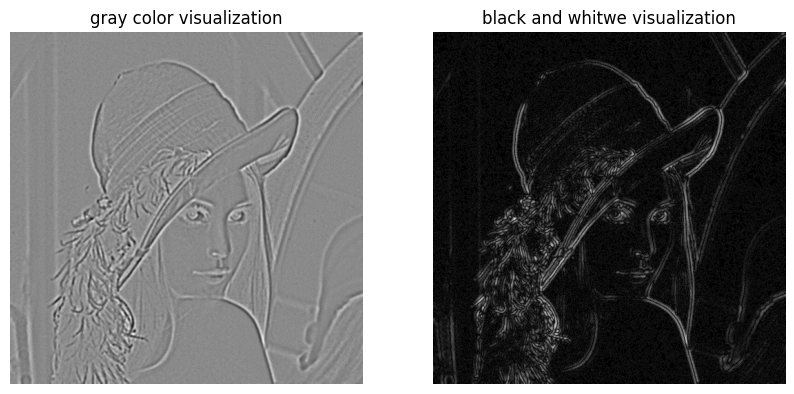

In [39]:
visualize(log1,log2,title1='gray color visualization',title2='black and whitwe visualization')

In [40]:
#plotting only strong zero crossings and ignoring weak zero crossings which can be as a result of noise

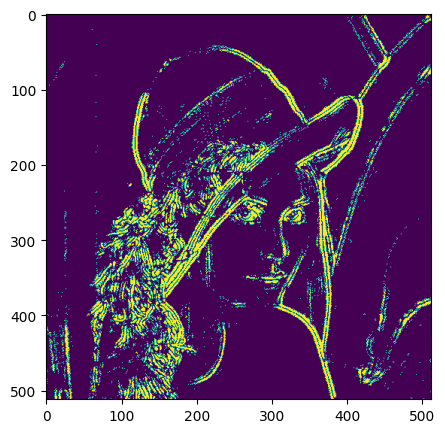

In [41]:
threshold = 5 # Adjust this threshold as needed

zero_crossings = np.where(np.logical_and(log2 > -threshold, log2 < threshold), 0,255).astype(np.uint8) 
#this line assigns 0 to those pixel values for which pixel intensities lies in range (-threshold, threshold) and 255 otherwise.

# Display the original image, LoG result, and zero crossings
plt.figure(figsize=(5, 5))
plt.imshow(zero_crossings)
plt.show()

# DoG(Difference of Gaussian)

- Filter image with Gaussian filter using $\sigma1$
- Filter image with Gaussian filter using $\sigma2$ 
- Find difference between the two filtered image which gives us Laplacian of Gaussian
- here $\sigma2$= k* $\sigma1$
- and $\sigma1$= 1.6 and k=$\sqrt{2}$
- I am choosing $\sigma1$= 1.6 and k=$\sqrt{2}$ because they are experimentally found to be optimum as mentioned in the [paper.](https://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf)

In [42]:
k=1.4
sigma=1.6
def difference_of_Gaussian(sigma=1.6,k=1.4):  
    filtered_img1 = cv2.GaussianBlur(gray_img, (0,0), sigma)
    filtered_img2 = cv2.GaussianBlur(gray_img, (0,0), k*sigma)
    dog=filtered_img2-filtered_img1 
    return dog

In [43]:
dog=difference_of_Gaussian(sigma=1.6,k=1.4)

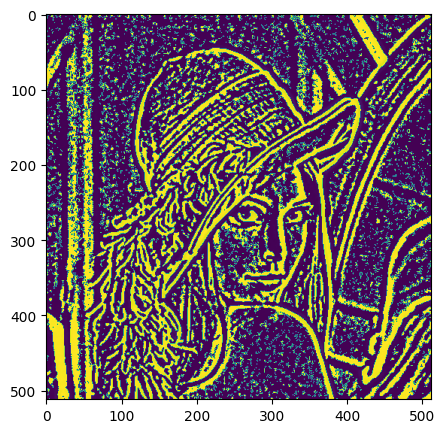

In [101]:
plt.figure(figsize=(5, 5))
plt.imshow(dog)
plt.show()

# Gaussian pyramid

In [12]:
# this function uses two 1D gaussian to find 5 by 5 2d gaussian filter
def gaussian_kernel(size, sigma):
    # Create 1D Gaussian kernel
    kernel_1d = cv2.getGaussianKernel(size, sigma) 

    # Create 2D Gaussian kernel
    kernel_2d = np.outer(kernel_1d, kernel_1d.transpose())
    # above line computes the outer product of kernel 1 and its transpose to give 2d kernel of 5 by 5 size

    return kernel_2d
kernel=gaussian_kernel(5,1)
kernel

array([[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.02193823, 0.09832033, 0.16210282, 0.09832033, 0.02193823],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]])

In [13]:
def forward_pass_with_padding(image, kernel):
    height, width, channels = image.shape
    ksize = kernel.shape[0]
    pad_size = ksize // 2
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='edge')
    output = np.zeros((height, width, channels))
    for i in range(height):
        for j in range(width):
            for c in range(channels):
                output[i, j, c] = np.sum(padded_image[i:i+ksize, j:j+ksize, c] * kernel)
    return output

In [14]:
def gaussian_pyramid(image, levels):
    pyramid = [image]
    kernel = gaussian_kernel(5, 1)
    for i in range(levels - 1):
        image = forward_pass_with_padding(image, kernel)
        image = image[::2, ::2]
        pyramid.append(image)
    return pyramid

In [15]:
pyramid=gaussian_pyramid(lena,4)

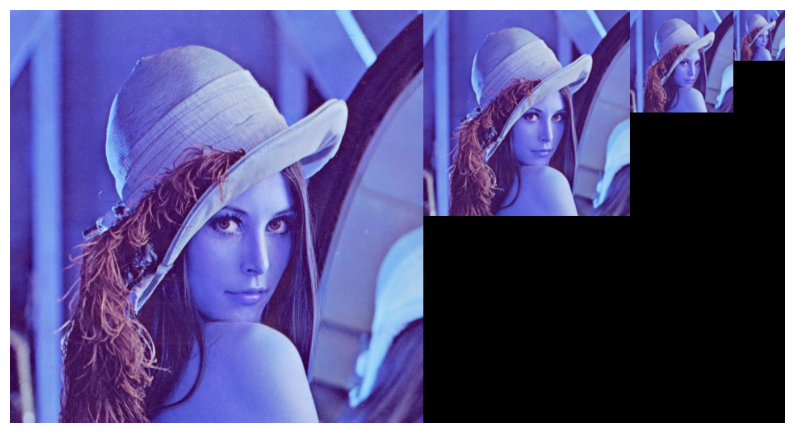

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have loaded the images for each level of the Gaussian pyramid
level0, level1, level2, level3 = pyramid  # Replace 'pyramid' with your actual data

# Determine the dimensions of the composite image
max_height = max(level0.shape[0], level1.shape[0], level2.shape[0], level3.shape[0])
total_width = (
    level0.shape[1] + level1.shape[1] + level2.shape[1] + level3.shape[1]
)

# Create a blank composite image with three channels
composite_image = np.zeros((max_height, total_width, 3), dtype=np.uint8)

# Paste each level into the composite image
composite_image[0:level0.shape[0], 0:level0.shape[1], :] = level0
composite_image[0:level1.shape[0], level0.shape[1]:level0.shape[1] + level1.shape[1], :] = level1
composite_image[0:level2.shape[0], level0.shape[1] + level1.shape[1]:level0.shape[1] + level1.shape[1] + level2.shape[1], :] = level2
composite_image[0:level3.shape[0], level0.shape[1] + level1.shape[1] + level2.shape[1]:, :] = level3

# Display the composite image using matplotlib
plt.imshow(composite_image,cmap='gray')
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

In [18]:
cv2.imwrite('gaussian_pyramid.jpg',composite_image)

True

# Q3

In [73]:
apple = cv2.imread('apple.jpeg')
orange = cv2.imread('orange.jpeg')

In [67]:
apple.shape

(353, 328, 3)

In [74]:
orange.shape

(365, 364, 3)

In [75]:
apple = cv2.resize(apple, (512, 512), interpolation=cv2.INTER_LINEAR)
orange = cv2.resize(orange, (512, 512), interpolation=cv2.INTER_LINEAR)

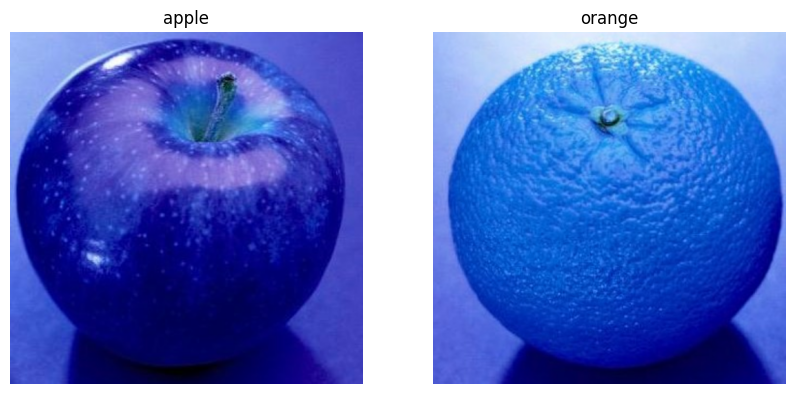

In [76]:
visualize(apple,orange,'apple','orange')

In [77]:
# generate Gaussian pyramid for A
gpA = gaussian_pyramid(apple,6)
# generate Gaussian pyramid for B
gpB = gaussian_pyramid(orange,6)

In [78]:
# generate Laplacian Pyramid for A
lpA = [gpA[5]]
for i in range(5,0,-1):
    
    GE = cv2.pyrUp(gpA[i])
    L=gpA[i-1]-GE
#     L = cv2.subtract(gpA[i-1],GE)
    lpA.append(L)
# generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range(5,0,-1):  
    GE = cv2.pyrUp(gpB[i])
    L=gpB[i-1]-GE

#     L = cv2.subtract(gpB[i-1],GE)
    lpB.append(L)
# Now add left and right halves of images in each level
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
    LS.append(ls)
# now reconstruct
ls_ = LS[0]
for i in range(1,6):
       
    ls_ = cv2.pyrUp(ls_)
    ls_=ls_+LS[i]
    
#     ls_ = cv.add(ls_, LS[i])
# image with direct connecting each half
real = np.hstack((apple[:,:cols//2],orange[:,cols//2:]))
cv2.imwrite('Pyramid_blending2.jpg',ls_)
cv2.imwrite('Direct_blending.jpg',real)

True

In [81]:
pyramid_blending=cv2.imread('Pyramid_blending2.jpg')
direct_blending=cv2.imread('Direct_blending.jpg')

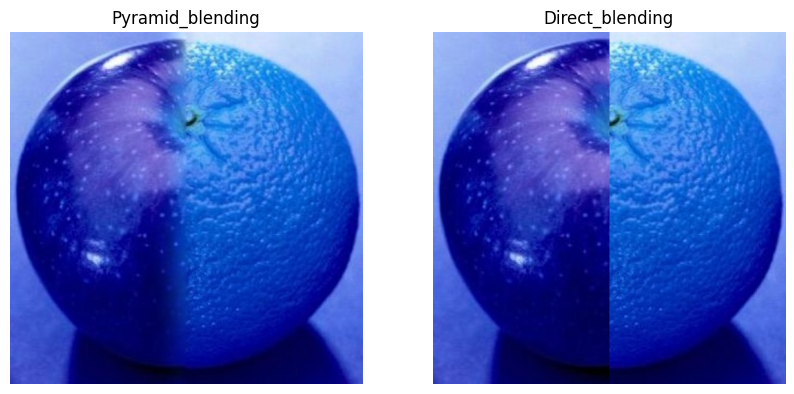

In [82]:
visualize(pyramid_blending,direct_blending,'Pyramid_blending','Direct_blending')